## 4. breast_cancer 데이터 활용 실습 진행 
=> KNN, Decision Tree, Random Forest 이외에 다른 분류 이용해보거나 조사, 해당 기법들 각각 설명, 결과 설명 등

In [3]:
from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer() 

위스콘신 유방암 데이터 세트는 종양의 크기, 모양 등의 다양한 속성 값을 기반으로 해당 종양이 악성인지 양성인지 분류한 데이터 세트.

sklearn 데이터셋 내에 유방암 데이터는 설명변수(=data)와 타겟(target)으로 나뉘어져 있음

In [8]:
cancer['data'].shape
#shape은 몇행 몇열인지 확인
#피쳐는 569행 30열=30개의 피쳐에 569개의 값들이 들어있음

(569, 30)

In [9]:
cancer['target'].shape
#타겟은 569행 1열= 하나의 타겟에 569개의 값들이 들어있음

(569,)

In [6]:
cancer['target_names']
#타겟의 이름은 malignant(악성)과 benign(양성)

array(['malignant', 'benign'], dtype='<U9')

In [10]:
cancer['target']
#타겟은 0 또는 1= 악성 또는 양성

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [11]:
import numpy as np

np.bincount(cancer['target'])
#bincount는 0부터 가장 큰 값까지 각각의, 발생 빈도수 체크
#0(악성)은 212개, 1(양성)은 357개

array([212, 357], dtype=int64)

#### 데이터셋 분리

In [12]:
#train-test-split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    stratify = cancer.target, 
                                                    random_state = 66) 
#stratify=cancer.target으로 지정하면 train,test 데이터에 각각의 비율이 쏠려서 분배되는 것을 방지함

### 모델 적용 1. kNN 분류

k-Nearest Neighbor k-최근접 이웃 

어떤 데이터가 주어지면 그 주변의 데이터 k개를 살펴본 뒤 더 많은 데이터가 포함되어있는 범주로 분류하는 방식

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [15]:
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

#train 데이터 성능은 약 0.948
#test 데이터 성능은 약 0.923

0.9483568075117371
0.9230769230769231


### 모델 적용 2. Decision Tree
https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-4-%EA%B2%B0%EC%A0%95-%ED%8A%B8%EB%A6%ACDecision-Tree

특정 기준(질문)에 따라 데이터를 구분하는 모델

In [17]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [19]:
print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

#train 데이터 성능은 1.0
#test 데이터 성능은 약 0.895

1.0
0.8951048951048951


#### 오버피팅과 언더피팅, 일반화 
https://22-22.tistory.com/35

위의 링크에 있는 그림 보여주면서 설명
지나친 단순화와 train 데이터만 정확하게 나타내는 언더피팅과 오버피팅을 줄이며 설계하는 것이 중요하며 이것을 일반화라고 한다. 

-> 파라미터 조정을 통해 조절 가능(5장에서 진행)

#### 피쳐 중요도 확인

In [32]:
import matplotlib.pyplot as plt

In [35]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)

#feature_importances_에는 각 피쳐의 중요도를 담고있음
#어떤 피쳐가 타겟을 예측하는 데 많은 영향을 미쳤는지 알 수 있음

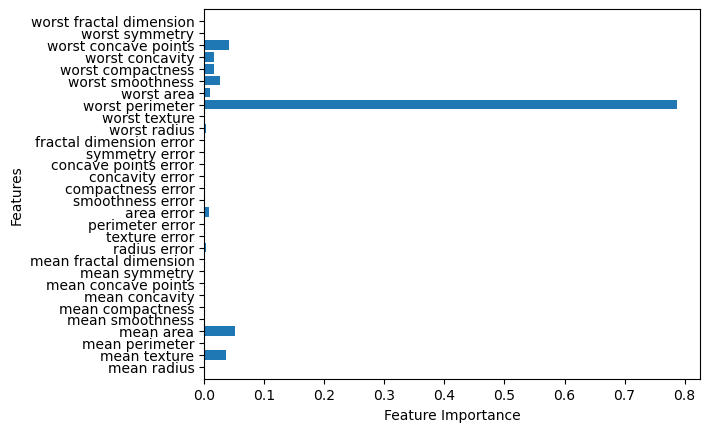

In [34]:
plot_feature_importances_cancer(tree)

### 모델 적용 3. Random Forest

https://hleecaster.com/ml-random-forest-concept/

앞서 배운 결정 트리는 오버피팅 경향이 있어 이를 극복하기 위한 전략이다. 무작위 숲이라는 이름 처럼 훈련을 통해 구성해놓은 다수의 나무들로부터 분류 결과를 취합해서 결론을 얻는 일종의 인기투표이다. 다수의 나무를 기반으로 예측하기 때문에 결정트리보다 좋은 일반화 성능을 보인다. 

In [36]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [38]:
print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))

#train 데이터 성능은 1.0
#test 데이터 성능은 약 0.958

1.0
0.958041958041958


#### 피쳐 중요도 확인

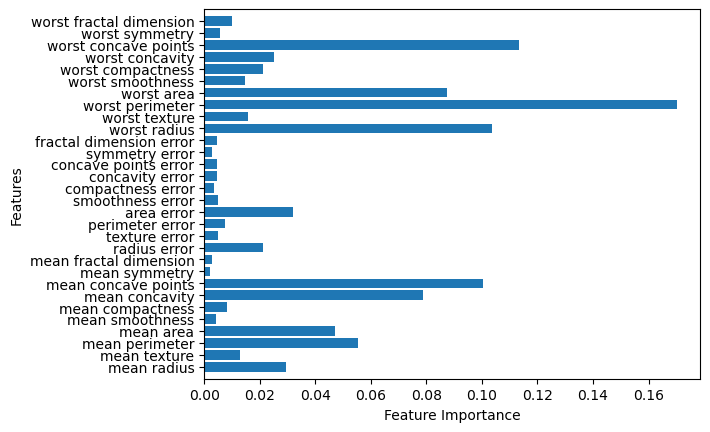

In [39]:
plot_feature_importances_cancer(forest)